# **Pisa Test 2015**

The Programme for International Student Assessment (PISA) is an international assessment measures students(about 15 years) skills on mathematicis, reading and science. In this notebook a short explatory data analysis of [dataset](https://www.kaggle.com/datasets/zazueta/pisa-scores-2015) will be conducted, which summarizes the results of the pisa test by country and sex. More comprehensive data can be found at [Pisa2015](https://www.oecd.org/pisa/data/2015database/). 

## **Import the required libraries**

In [76]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

## **Reading and understanding of the data**


The dataset contains the mean  scores in math, reading and science by country and sex.

Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.

In [77]:
pisa = pd.read_csv("Pisa mean perfromance scores 2013 - 2015 Data.csv")
pisa.head()

,Country Name,Country Code,Series Name,Series Code,2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Albania,ALB,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,..,..,413.157
1,Albania,ALB,PISA: Mean performance on the mathematics scal...,LO.PISA.MAT.FE,..,..,417.750029482799
2,Albania,ALB,PISA: Mean performance on the mathematics scal...,LO.PISA.MAT.MA,..,..,408.545458736189
3,Albania,ALB,PISA: Mean performance on the reading scale,LO.PISA.REA,..,..,405.2588
4,Albania,ALB,PISA: Mean performance on the reading scale. F...,LO.PISA.REA.FE,..,..,434.639625546737


The dataset contains scores for seems to contain scores from 2013, 2014 which seem to be empty. Try to verify this.

In [78]:
pisa.describe()

,Country Name,Country Code,Series Name,Series Code,2013 [YR2013],2014 [YR2014],2015 [YR2015]
count,1163,1161,1161,1161,1161,1161,1161
unique,131,129,9,9,1,1,613
top,Albania,ALB,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,..,..,..
freq,9,9,129,129,1161,1161,549


One can see that these rows contain no information, so they will be code dropped. Also the columns 'Country Code' and 'Series Code' will be dropped.

One can see that the data set contain to missing observations. Try to find these two rows.

In [79]:
pisa.drop(columns=['Country Code','Series Code','2013 [YR2013]','2014 [YR2014]'],inplace=True)

Also there seems to be more countries in the data than actually to part in the test. About 75 countries participated but the dataset contains 131 countries. Try to investigate this issue.

In [80]:
pisa.groupby(by="Country Name").describe()

Series Name         \
                    count unique   
Country Name                       
Albania                 9      9   
Algeria                 9      9   
Argentina               9      9   
Armenia                 9      9   
Australia               9      9   
...                   ...    ...   
Venezuela, RB           9      9   
Vietnam                 9      9   
Yemen, Rep.             9      9   
Zambia                  9      9   
Zimbabwe                9      9   

                                                                     \
                                                           top freq   
Country Name                                                          
Albania        PISA: Mean performance on the mathematics scale    1   
Algeria        PISA: Mean performance on the mathematics scale    1   
Argentina      PISA: Mean performance on the mathematics scale    1   
Armenia        PISA: Mean performance on the mathematics scale    1   
Australia      PISA: Mean performance on the mathematics scale    1   
...                                                        ...  ...   
Venezuela, RB  PISA: Mean performance on the mathematics scale    1   
Vietnam        PISA: Mean performance on the mathematics scale    1   
Yemen, Rep.    PISA: Mean performance on the mathematics scale    1   
Zambia         PISA: Mean performance on the mathematics scale    1   
Zimbabwe       PISA: Mean performance on the mathematics scale    1   

              2015 [YR2015]                        
                      count unique       top freq  
Country Name                                       
Albania                   9      9   413.157    1  
Algeria                   9      9  359.6062    1  
Argentina                 9      9  409.0333    1  
Armenia                   9      1        ..    9  
Australia                 9      9  493.8962    1  
...                     ...    ...       ...  ...  
Venezuela, RB             9      1        ..    9  
Vietnam                   9      9  494.5183    1  
Yemen, Rep.               9      1        ..    9  
Zambia                    9      1        ..    9  
Zimbabwe                  9      1        ..    9  

[131 rows x 8 columns]

One can see that the data set contains many countries not having participated in PISA 2015. Remove all these rows.

In [81]:
pisa.replace({'..':None},inplace=True)
pisa.dropna(inplace=True)

In [82]:
pisa

,Country Name,Series Name,2015 [YR2015]
0,Albania,PISA: Mean performance on the mathematics scale,413.157
1,Albania,PISA: Mean performance on the mathematics scal...,417.750029482799
2,Albania,PISA: Mean performance on the mathematics scal...,408.545458736189
3,Albania,PISA: Mean performance on the reading scale,405.2588
4,Albania,PISA: Mean performance on the reading scale. F...,434.639625546737
...,...,...,...
1129,Vietnam,PISA: Mean performance on the reading scale. F...,499.038588841179
1130,Vietnam,PISA: Mean performance on the reading scale. Male,473.919128834918
1131,Vietnam,PISA: Mean performance on the science scale,524.6445
1132,Vietnam,PISA: Mean performance on the science scale. F...,525.913919172001


No take a look at the 'Series Name' column to verify that each remainig country appears in each category.

In [83]:
pisa['Series Name'].value_counts()

PISA: Mean performance on the mathematics scale            68
PISA: Mean performance on the mathematics scale. Female    68
PISA: Mean performance on the mathematics scale. Male      68
PISA: Mean performance on the reading scale                68
PISA: Mean performance on the reading scale. Female        68
PISA: Mean performance on the reading scale. Male          68
PISA: Mean performance on the science scale                68
PISA: Mean performance on the science scale. Female        68
PISA: Mean performance on the science scale. Male          68
Name: Series Name, dtype: int64

One can see that each country appears each category. Note here that some countries seems to be missing, they will be ignored since these are only a few and do not affect the overall analysis. In the next step rename the 'Series name' will be renamed to 
shorter titles.

In [84]:
pisa.replace({'PISA: Mean performance on the mathematics scale': 'Mean Math Overall',
            'PISA: Mean performance on the mathematics scale. Female': 'Mean Math Female',
            'PISA: Mean performance on the mathematics scale. Male': 'Mean Math Female ',
            'PISA: Mean performance on the reading scale': 'Mean Read Overall',
            'PISA: Mean performance on the reading scale. Female': 'Mean Read Female',
            'PISA: Mean performance on the reading scale. Male': 'Mean Read Male',
            'PISA: Mean performance on the science scale': 'Mean Science Overall',
            'PISA: Mean performance on the science scale. Female': 'Mean Science Female',
            'PISA: Mean performance on the science scale. Male': 'Mean Science Male'
            },inplace=True)

In [85]:
pisa

,Country Name,Series Name,2015 [YR2015]
0,Albania,Mean Math Overall,413.157
1,Albania,Mean Math Female,417.750029482799
2,Albania,Mean Math Female,408.545458736189
3,Albania,Mean Read Overall,405.2588
4,Albania,Mean Read Female,434.639625546737
...,...,...,...
1129,Vietnam,Mean Read Female,499.038588841179
1130,Vietnam,Mean Read Male,473.919128834918
1131,Vietnam,Mean Science Overall,524.6445
1132,Vietnam,Mean Science Female,525.913919172001


Now turn the long data to wide data, setting as index each country containing info about the scores. 

In [86]:
pisa2 = pisa.pivot_table(index=["Country Name"], 
                    columns='Series Name', 
                    values='2015 [YR2015]')

In [87]:
pisa2.head()

Series Name,Mean Math Female,Mean Math Female,Mean Math Overall,Mean Read Female,Mean Read Male,Mean Read Overall,Mean Science Female,Mean Science Male,Mean Science Overall
Country Name,,,,,,,,,
Albania,417.750029,408.545459,413.1570,434.639626,375.759199,405.2588,439.442963,414.957644,427.2250
Algeria,363.072479,356.495106,359.6062,366.208167,335.185436,349.8593,383.220939,369.035234,375.7451
Argentina,400.443116,418.388361,409.0333,432.958080,416.966607,425.3031,424.994351,440.102030,432.2262
Australia,490.985501,496.761345,493.8962,518.865799,487.185525,502.9006,508.921647,511.049257,509.9939
Austria,483.133026,510.098216,496.7423,495.075191,474.846032,484.8656,485.526754,504.371197,495.0375


That looks much better than the original data frame. This data frame will be used for further analysis.

In the next step the numeric values will be rounded, since it is not necessary.

In [88]:
pisa2 = pisa2.round()

Create a boxplot of all variables and get a understanding of the distribution of the variables.

<AxesSubplot:>

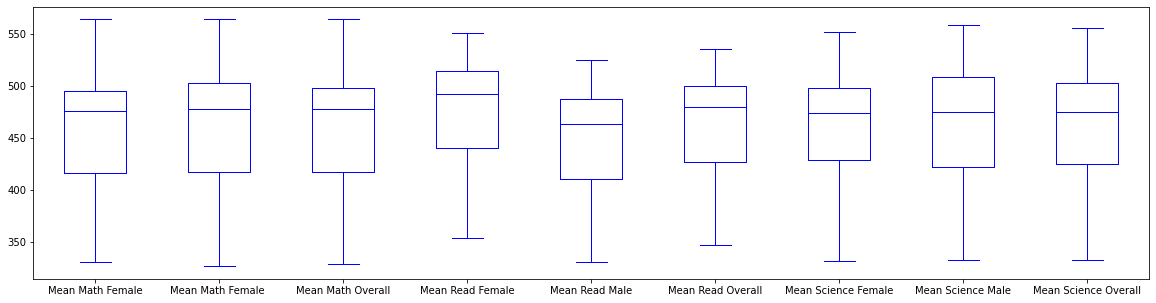

In [89]:
pisa2.plot(kind='box', figsize=(20, 5),color='blue')


One can see that the distributions are all very similar, containing no outliers. The only interesting part is that females reading average skill is significantly higher than of males.

Filter top 20 countries and create a barplot comparing the scores in each category. 

In [90]:
pisa2["Total Average"] = (pisa2["Mean Math Overall"] + pisa2["Mean Read Overall"] + pisa2["Mean Science Overall"]) / 3
pisa_top = pisa2.sort_values(by=['Total Average'],ascending=False).head(20)

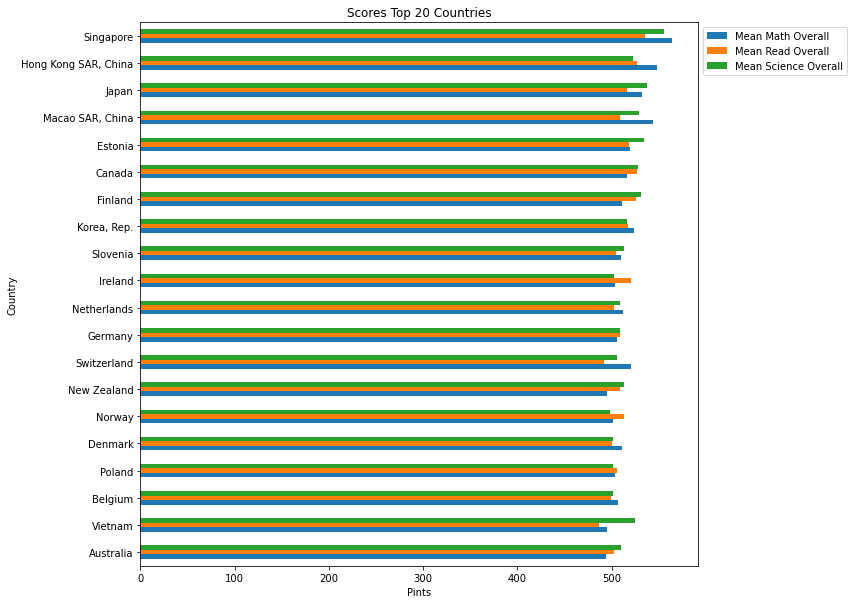

In [91]:
pisa_top.sort_values(by=['Total Average'],ascending=True)[['Mean Math Overall','Mean Read Overall','Mean Science Overall']].plot(kind='barh', 
                                                                                            figsize=(10, 10),legend=False)


plt.xlabel('Pints') # add to x-label to the plot
plt.ylabel('Country') # add y-label to the plot
plt.title('Scores Top 20 Countries') # add title to the plot
plt.legend(loc=0,bbox_to_anchor=(1,1))


plt.show()


On can see that the top countries are all located in east asia. Also the all features seem to be highly positive corrolated. The  only exception is here Vietnam, there the science score is noticeably higher than the other two scores.

Classify Countries per Region to get more insights about differences between regions.

In [92]:
countries= list(pisa['Country Name'].unique())
dict_cont={
'Albania':'South Europe',
 'Algeria':'Arab Country',
 'Argentina':'Latin America',
 'Australia':'North America and Oceania',
 'Austria':'West Europe',
 'Belgium':'West Europe',
 'Brazil':'Latin America',
 'Bulgaria':'East Europe',
 'Canada':'North America and Oceania',
 'Chile':'Latin America',
 'Colombia':'Latin America',
 'Costa Rica':'Latin America',
 'Croatia':'South Europe',
 'Cyprus':'South Europe',
 'Czech Republic':'East Europe',
 'Denmark':'North Europe',
 'Dominican Republic':'Latin America',
 'Estonia':'North Europe',
 'Finland':'North Europe',
 'France':'West Europe',
 'Georgia':'East Europe',
 'Germany':'West Europe',
 'Greece':'South Europe',
 'Hong Kong SAR, China':'East Asia',
 'Hungary':'East Europe',
 'Iceland':'North Europe',
 'Indonesia':'East Asia',
 'Ireland':'North Europe',
 'Israel':'West Europe',
 'Italy':'South Europe',
 'Japan':'East Asia',
 'Jordan':'Arab Country',
 'Kazakhstan':'East Europe',
 'Korea, Rep.':'East Asia',
 'Latvia':'North Europe',
 'Lebanon':'Arab Country',
 'Lithuania':'North Europe',
 'Luxembourg':'West Europe',
 'Macao SAR, China':'East Asia',
 'Macedonia, FYR':'South Europe',
 'Malaysia':'East Asia',
 'Malta':'South Europe',
 'Mexico':'Latin America',
 'Moldova':'East Europe',
 'Montenegro':'South Europe',
 'Netherlands':'West Europe',
 'New Zealand':'North America and Oceania',
 'Norway':'North Europe',
 'Peru':'Latin America',
 'Poland':'East Europe',
 'Portugal':'South Europe',
 'Qatar':'Arab Country',
 'Russian Federation':'East Europe',
 'Singapore':'East Asia',
 'Slovak Republic':'East Europe',
 'Slovenia':'South Europe',
 'Spain':'South Europe',
 'Sweden':'North Europe',
 'Switzerland':'West Europe',
 'Thailand':'East Asia',
 'Trinidad and Tobago':'North America and Oceania',
 'Tunisia':'Arab Country',
 'Turkey':'Arab Country',
 'United Arab Emirates':'Arab Country',
 'United Kingdom':'North Europe',
 'United States':'North America and Oceania',
 'Uruguay':'Latin America',
 'Vietnam':'East Asia'}

In [93]:
for country in countries:
    pisa2.loc[country,'Region'] = dict_cont[country]

Investigate differences between regions.

In [94]:
pisa2[['Mean Math Overall','Mean Read Overall','Mean Science Overall','Region']].groupby(by='Region').describe(percentiles=[.5])

Series Name               Mean Math Overall                                \
                                      count        mean        std    min   
Region                                                                      
Arab Country                            7.0  393.142857  25.524032  360.0   
East Asia                               9.0  494.888889  64.092598  386.0   
East Europe                             9.0  463.000000  34.723911  404.0   
Latin America                           9.0  393.333333  28.679261  328.0   
North America and Oceania               5.0  478.400000  37.990788  417.0   
North Europe                           10.0  498.200000  13.669105  478.0   
South Europe                           11.0  455.818182  42.123196  371.0   
West Europe                             8.0  499.000000  16.106787  470.0   

Series Name                             Mean Read Overall              \
                             50%    max             count        mean   
Region                                                                  
Arab Country               396.0  427.0               7.0  390.000000   
East Asia                  524.0  564.0               9.0  480.888889   
East Europe                475.0  504.0               9.0  454.111111   
Latin America              400.0  423.0               9.0  417.666667   
North America and Oceania  494.0  516.0               5.0  492.600000   
North Europe               498.0  520.0              10.0  501.900000   
South Europe               464.0  510.0              11.0  455.636364   
West Europe                501.5  521.0               8.0  493.375000   

Series Name                                                \
                                 std    min    50%    max   
Region                                                      
Arab Country               36.828431  347.0  402.0  434.0   
East Asia                  53.750452  397.0  509.0  535.0   
East Europe                37.411377  401.0  453.0  506.0   
Latin America              28.209041  358.0  425.0  459.0   
North America and Oceania  38.351010  427.0  503.0  527.0   
North Europe               17.847813  472.0  500.0  526.0   
South Europe               47.111087  352.0  467.0  505.0   
West Europe                10.901343  479.0  495.5  509.0   

Series Name               Mean Science Overall                                \
                                         count        mean        std    min   
Region                                                                         
Arab Country                               7.0  405.285714  22.990681  376.0   
East Asia                                  9.0  494.888889  56.452291  403.0   
East Europe                                9.0  462.222222  30.375886  411.0   
Latin America                              9.0  410.666667  33.503731  332.0   
North America and Oceania                  5.0  494.400000  40.426476  425.0   
North Europe                              10.0  500.800000  20.307634  473.0   
South Europe                              11.0  458.000000  40.306327  384.0   
West Europe                                8.0  495.750000  14.567577  467.0   

Series Name                              
                             50%    max  
Region                                   
Arab Country               409.0  437.0  
East Asia                  523.0  556.0  
East Europe                461.0  501.0  
Latin America              416.0  447.0  
North America and Oceania  510.0  528.0  
North Europe               500.0  534.0  
South Europe               465.0  513.0  
West Europe                498.5  509.0

One see in Latin America and Arab Country the scores are the lowest. Looking at Europe one can see that in Western Europe and Northern Europe the scores are higher with low deviation, as opposed to Eastern and Southern Europe the scores are lower with high deviation. 
Looking at East Asia one can see that the scores are relatively high with very high deviation, which may be due to the discrepany between countries of the [Sinosphere](https://en.wikipedia.org/wiki/East_Asian_cultural_sphere) and other countries(East Asia means here the regions East Asia and Southeast Asia)

## **Log Transformation**


In this section, it will inspected whether our features data are normally distributed. Since the distributions of all features 
are very similiar it will be done only for one feature, namely 'Mean Math Overall'.


C:\Users\fjung\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


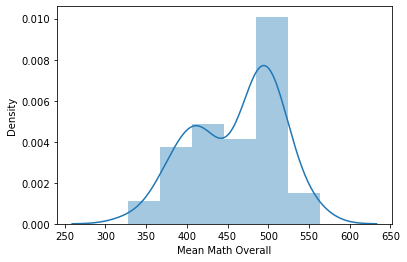

In [95]:
sp_untransformed = sns.distplot(pisa2['Mean Math Overall'])

One can see that the curve has not the typical **bell shape** of the normal distribution and is slightly skewed.

In [96]:
print("Skewness: %f" % pisa2['Mean Math Overall'].skew())

Skewness: -0.382488


Apply the log transform and plot distribution again.

C:\Users\fjung\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


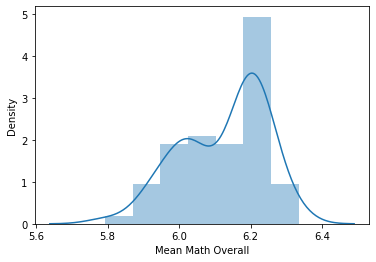

In [97]:
log_transformed = np.log(pisa2['Mean Math Overall'])
sp_transformed = sns.distplot(log_transformed)

In [98]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: -0.581533


# **Hypothesis Testing**


Here are three hypothesis about the data.
1. Students in the Sinospere performances are higher than in other regions.
1. There is no differene in math and science between female and male.
1. Female reading skills are higher than male.


### 1. Choose a sample statistic


Let 𝜇1 be the country mean for reading of males and 𝜇2 be the the country mean for reading of females. Compare these two mean values, :𝜇_1 and 𝜇_2, statistically.

### 2. Define hypothesis (Null and Alternative)


$ 𝐻\_{0}:\mu\_{1}-\mu\_{2} = 0 $ There is no difference between the countries average reading skills between man and woman \
$ 𝐻\_{A}:\mu\_{1}-\mu\_{2} != 0 $ There is a difference between the countries average reading skills between man and woman

### 3. Evaluate and interpret the result


In [99]:
female_read = pisa2['Mean Read Female']
male_read = pisa2['Mean Read Male']

C:\Users\fjung\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\fjung\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mean Read Male', ylabel='Density'>

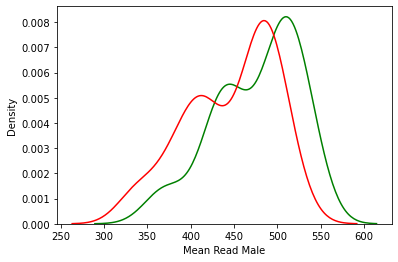

In [100]:
sns.distplot(female_read,color='green',hist=False)
sns.distplot(male_read,color='red',hist=False)

In [101]:
female_read.mean()

476.19117647058823

In [102]:
male_read.mean()

445.8529411764706

In [103]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(male_read, female_read)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  -3.5021890108936007 , p_value1 =  0.0006274701205930803


In [104]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between reading skills of females and males.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is no difference between reading skills of females and males.")

Conclusion: since p_value 0.0006274701205930803 is less than alpha 0.05 
Reject the null hypothesis that there is no difference between reading skills of females and males.


## **Conclusion**

This data set is very limited, since it contains not data for each student but only the average for each country. For further analysis one may use the raw data at  __[Pisa 2015](https://www.oecd.org/pisa/data/2015database/)__. Also in the pisa assessement some regions are not represented as Southern Asia or Sub-Saharan Africa, which is a negative aspect.